In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
import numpy as np

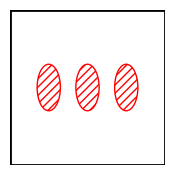

In [31]:
def draw_card(ax, shape, color, fill, count):
  """Draws a single Set card on the given axes."""

  # Card background
  card = Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='white')
  ax.add_patch(card)

  # Shape properties
  shape_map = {'oval': Ellipse, 'squiggle': Ellipse, 'diamond': plt.Polygon}
  color_map = {'red': 'r', 'green': 'g', 'purple': 'purple'}

  # Calculate shape positions
  if count == 1:
    positions = [(0.5, 0.5)]
  elif count == 2:
    positions = [(0.3, 0.5), (0.7, 0.5)]
  else:
    positions = [(0.25, 0.5), (0.5, 0.5), (0.75, 0.5)]

  # Draw shapes
  for pos in positions:
    if shape == 'squiggle':
      # Squiggle implementation (approximation)
      x = np.linspace(0, 1, 50)
      y = np.sin(4 * np.pi * x) / 8 + pos[1]
      ax.plot(x, y, color=color_map[color], linewidth=3)
    else:
      shape_obj = shape_map[shape](pos, 0.15, 0.3)
      if fill == 'solid':
        shape_obj.set_facecolor(color_map[color])
      elif fill == 'striped':
        shape_obj.set_hatch('////')
        shape_obj.set_facecolor('none')
        shape_obj.set_edgecolor(color_map[color])
      else:
        shape_obj.set_facecolor('none')
        shape_obj.set_edgecolor(color_map[color])
      ax.add_patch(shape_obj)

def generate_card_image(shape, color, fill, count):
  """Generates an image of a Set card with the given attributes."""

  fig, ax = plt.subplots(figsize=(2, 3))
  ax.set_aspect('equal')
  ax.axis('off')

  draw_card(ax, shape, color, fill, count)

  plt.show()

# Example usage:
generate_card_image('oval', 'red', 'striped', 4)

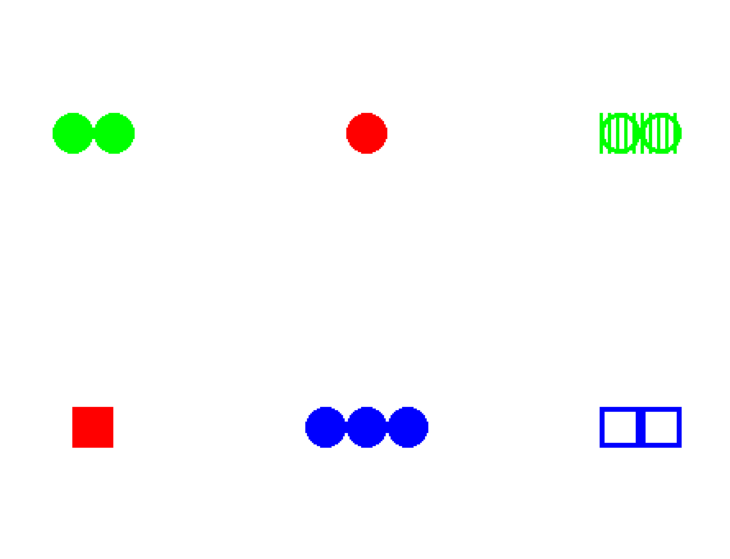

In [30]:
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Define card features
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Red, Green, Blue
shapes = ["circle", "square", "triangle"]
fills = ["solid", "striped", "empty"]
numbers = [1, 2, 3]

# Card size
card_width = 100
card_height = 150

def generate_card(color, shape, fill, number):
    """Generates an image of a card with the given features."""

    card_img = Image.new("RGB", (card_width, card_height), (255, 255, 255))
    draw = ImageDraw.Draw(card_img)

    # Calculate shape size and position for centering
    shape_size = card_width // 4
    x_center = card_width // 2
    y_center = card_height // 2

    # Draw shapes based on features
    for i in range(number):
        x = x_center - (shape_size * (number - 1) // 2) + (i * shape_size)
        y = y_center

        if shape == "circle":
            draw.ellipse((x - shape_size // 2, y - shape_size // 2, 
                          x + shape_size // 2, y + shape_size // 2), 
                         outline=color, width=3)
            if fill == "solid":
                draw.ellipse((x - shape_size // 2, y - shape_size // 2, 
                              x + shape_size // 2, y + shape_size // 2), 
                             fill=color)
            elif fill == "striped":
                for stripe in range(0, shape_size, 5):
                    draw.line((x - shape_size // 2 + stripe, y - shape_size // 2, 
                               x - shape_size // 2 + stripe, y + shape_size // 2), 
                              fill=color, width=2)
        elif shape == "square":
            draw.rectangle((x - shape_size // 2, y - shape_size // 2, 
                            x + shape_size // 2, y + shape_size // 2), 
                           outline=color, width=3)
            if fill == "solid":
                draw.rectangle((x - shape_size // 2, y - shape_size // 2, 
                                x + shape_size // 2, y + shape_size // 2), 
                               fill=color)
            elif fill == "striped":
                for stripe in range(0, shape_size, 5):
                    draw.line((x - shape_size // 2, y - shape_size // 2 + stripe, 
                               x + shape_size // 2, y - shape_size // 2 + stripe), 
                              fill=color, width=2)
        elif shape == "triangle":
            draw.polygon([(x, y - shape_size // 2), 
                          (x - shape_size // 2, y + shape_size // 2), 
                          (x + shape_size // 2, y + shape_size // 2)], 
                         outline=color, width=3)
            if fill == "solid":
                draw.polygon([(x, y - shape_size // 2), 
                              (x - shape_size // 2, y + shape_size // 2), 
                              (x + shape_size // 2, y + shape_size // 2)], 
                             fill=color)
            elif fill == "striped":
                for stripe in range(0, shape_size, 5):
                    draw.line((x - stripe // 2, y + shape_size // 2 - stripe, 
                               x + stripe // 2, y + shape_size // 2 - stripe), 
                              fill=color, width=2)

    return card_img

# Generate and display some example cards
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
for i in range(2):
    for j in range(3):
        color = random.choice(colors)
        shape = random.choice(shapes)
        fill = random.choice(fills)
        number = random.choice(numbers)
        card = generate_card(color, shape, fill, number)
        axes[i, j].imshow(card)
        axes[i, j].axis('off')
plt.show()

AttributeError: module 'PIL.Image' has no attribute 'polylines'

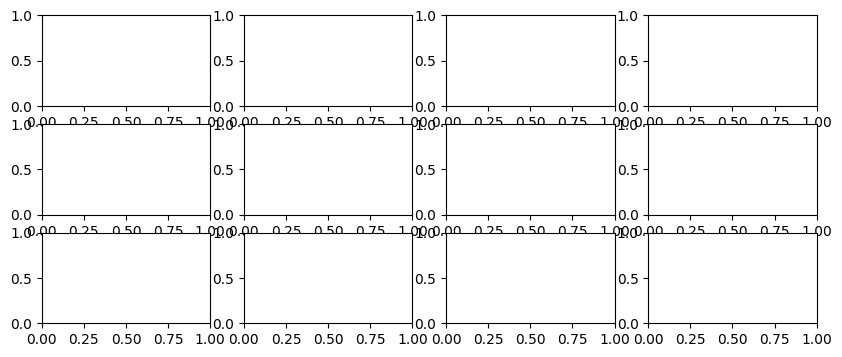

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image, ImageDraw
from PIL import Image as cv2
 

# Define card features and their possible states
features = {
    'shape_outline': ['circle', 'square', 'triangle'],
    'shape_fill': ['empty', 'striped', 'filled'],
    'texture': ['smooth', 'dotted', 'wavy'],
    'corner_curl': ['none', 'up', 'down']
}

# Function to generate a single card image
def generate_card(shape_outline, shape_fill, texture, corner_curl):
    """
    Generates a card image based on given features.

    Args:
        shape_outline (str): 'circle', 'square', or 'triangle'
        shape_fill (str): 'empty', 'striped', or 'filled'
        texture (str): 'smooth', 'dotted', or 'wavy'
        corner_curl (str): 'none', 'up', or 'down'

    Returns:
        numpy array: Image representation of the card.
    """

    # Card size
    card_size = (100, 100)
    card = np.ones(card_size, dtype=np.uint8) * 255  # White background

    # Shape parameters
    center_x, center_y = card_size[1] // 2, card_size[0] // 2
    size = 30

    # Draw shape outline
    if shape_outline == 'circle':
        shape = np.zeros_like(card)
        cv2.circle(shape, (center_x, center_y), size // 2, 0, thickness=-1 if shape_fill == 'filled' else 2)
    elif shape_outline == 'square':
        shape = np.zeros_like(card)
        cv2.rectangle(shape, (center_x - size // 2, center_y - size // 2), 
                      (center_x + size // 2, center_y + size // 2), 
                      0, thickness=-1 if shape_fill == 'filled' else 2)
    else:  # triangle
        shape = np.zeros_like(card)
        pts = np.array([[center_x, center_y - int(size * 0.8)],
                        [center_x - size // 2, center_y + int(size * 0.4)],
                        [center_x + size // 2, center_y + int(size * 0.4)]], np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(shape, [pts], True, 0, thickness=-1 if shape_fill == 'filled' else 2)

    # Apply shape fill
    if shape_fill == 'striped':
        for i in range(0, card_size[0], 5):
            cv2.line(shape, (0, i), (card_size[1], i), 0, 1)

    # Apply texture
    if texture == 'dotted':
        for i in range(100):
            cv2.circle(card, (random.randint(0, card_size[1]), random.randint(0, card_size[0])), 1, 0, -1)
    elif texture == 'wavy':
        for i in range(0, card_size[1], 10):
            cv2.ellipse(card, (i, center_y), (5, 15), i * 3, 0, 360, 0, 1)

    # Apply corner curl (simulated by shading)
    if corner_curl == 'up':
        cv2.rectangle(card, (0, 0), (card_size[1] // 3, card_size[0] // 3), 128, -1)
    elif corner_curl == 'down':
        cv2.rectangle(card, (card_size[1] * 2 // 3, card_size[0] * 2 // 3), card_size, 128, -1)

    # Combine shape and card background
    card = cv2.bitwise_or(card, shape)

    return card

# Function to generate and plot a set of cards
def generate_and_plot_cards(num_cards=12):
    """Generates and plots a set of cards."""

    fig, axes = plt.subplots(nrows=num_cards // 4, ncols=4, figsize=(10, num_cards // 3))

    for i in range(num_cards):
        # Generate random feature combinations
        shape_outline = random.choice(features['shape_outline'])
        shape_fill = random.choice(features['shape_fill'])
        texture = random.choice(features['texture'])
        corner_curl = random.choice(features['corner_curl'])

        # Generate card image
        card_image = generate_card(shape_outline, shape_fill, texture, corner_curl)

        # Plot the card
        ax = axes[i // 4, i % 4]
        ax.imshow(card_image, cmap='gray')
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

# --- Generate and display 12 random cards ---
generate_and_plot_cards()